# Hot Dog or Not?
   The Hot dog or not is a binary classification problem where we need predict whether the image contains hot dog or not.  In this notebook, **TensorFlow** is used to create the Neural Network.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/hot-dog/hotdog/train/not-hotdog/206.png
/kaggle/input/hot-dog/hotdog/train/not-hotdog/525.png
/kaggle/input/hot-dog/hotdog/train/not-hotdog/512.png
/kaggle/input/hot-dog/hotdog/train/not-hotdog/842.png
/kaggle/input/hot-dog/hotdog/train/not-hotdog/161.png
/kaggle/input/hot-dog/hotdog/train/not-hotdog/947.png
/kaggle/input/hot-dog/hotdog/train/not-hotdog/221.png
/kaggle/input/hot-dog/hotdog/train/not-hotdog/740.png
/kaggle/input/hot-dog/hotdog/train/not-hotdog/77.png
/kaggle/input/hot-dog/hotdog/train/not-hotdog/157.png
/kaggle/input/hot-dog/hotdog/train/not-hotdog/266.png
/kaggle/input/hot-dog/hotdog/train/not-hotdog/195.png
/kaggle/input/hot-dog/hotdog/train/not-hotdog/975.png
/kaggle/input/hot-dog/hotdog/train/not-hotdog/1.png
/kaggle/input/hot-dog/hotdog/train/not-hotdog/853.png
/kaggle/input/hot-dog/hotdog/train/not-hotdog/111.png
/kaggle/input/hot-dog/hotdog/train/not-hotdog/57.png
/kaggle/input/hot-dog/hotdog/train/not-hotdog/284.png
/kaggle/input/hot-dog/hotdog/tra

the **generator()** function creates an ImageDataGenerator object and return it to the calling function.  To increase the accuracy of the model, data augmentation is used.

In [2]:
def generator():
    data_generator=tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        rotation_range=45,
        width_shift_range=0.3,
        height_shift_range=0.3,
        shear_range=0.1,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
    
    return data_generator

Here, training and testing ImageDataGenerator were created by calling the generator function.

In [3]:
train_generator=generator()
test_generator=generator()

In [4]:
def data_flow(path,generator):
    data_flow=train_generator.flow_from_directory(path,batch_size=100,class_mode='binary')
    return data_flow;

In [5]:
train_dir='../input/hot-dog/hotdog/train'
train_data_generator=data_flow(train_dir,train_generator)

Found 2000 images belonging to 2 classes.


In [6]:
test_dir='../input/hot-dog/hotdog/test'
test_data_generator=data_flow(test_dir,train_generator)

Found 800 images belonging to 2 classes.


# Model Creation
   The Convolutional Neural network is created below.  This neural network consists of 3 convolution layer and 3 neural network layers.  Dropout is being implemented in the network to eliminate some neurons.  Here, the model eliminates 40% of the neurons with Dropout.
   The output layer has a single neuron which tells whether the image contains hot dog or not.
![](https://cdn-images-1.medium.com/max/1000/1*uxpH46OpTIj63j1MKQ-T2Q.png)  

In [7]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(3,3),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(3,3),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(3,3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1,activation='sigmoid')
    
])

# MODEL COMPILATION
   The model is compiled by using the loss function as **binary cross entropy** and the optimizer used here is **RMSprop**.

In [8]:
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.RMSprop(lr=0.001),metrics=['acc'])

# TRAINING
  The network is trained with the training data for upto 15 epochs.

In [9]:
model_training=model.fit_generator(train_data_generator,
                                   epochs=15,
                                   validation_data=test_data_generator,
                                   validation_steps=8)

Train for 20 steps, validate for 8 steps
Epoch 1/15
20/20 [==============================] - 96s 5s/step - loss: 0.6810 - acc: 0.6030 - val_loss: 0.5667 - val_acc: 0.7738
Epoch 2/15
20/20 [==============================] - 90s 4s/step - loss: 0.5025 - acc: 0.7740 - val_loss: 0.4377 - val_acc: 0.8150
Epoch 3/15
20/20 [==============================] - 90s 5s/step - loss: 0.4659 - acc: 0.8015 - val_loss: 0.4066 - val_acc: 0.8350
Epoch 4/15
20/20 [==============================] - 89s 4s/step - loss: 0.4319 - acc: 0.8145 - val_loss: 0.3951 - val_acc: 0.8375
Epoch 5/15
20/20 [==============================] - 90s 4s/step - loss: 0.4337 - acc: 0.8130 - val_loss: 0.5723 - val_acc: 0.7387
Epoch 6/15
20/20 [==============================] - 89s 4s/step - loss: 0.4331 - acc: 0.8110 - val_loss: 0.3694 - val_acc: 0.8550
Epoch 7/15
20/20 [==============================] - 90s 5s/step - loss: 0.4183 - acc: 0.8245 - val_loss: 0.4259 - val_acc: 0.8263
Epoch 8/15
20/20 [==============================]

The Network gave an accuracy of 82% with training data and 80% with testing data.

In [10]:
accuracy=model_training.history['acc']
validation_acc=model_training.history['val_acc']
loss=model_training.history['loss']
validation_loss=model_training.history['val_loss']

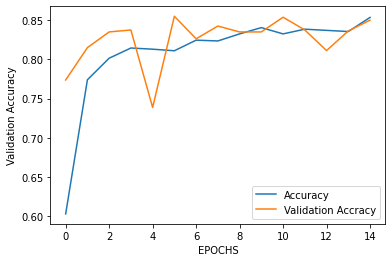

In [11]:
import matplotlib.pyplot as plt
plt.plot(list(range(15)),accuracy,label="Accuracy")
plt.plot(list(range(15)),validation_acc,label="Validation Accracy")
plt.xlabel("EPOCHS")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

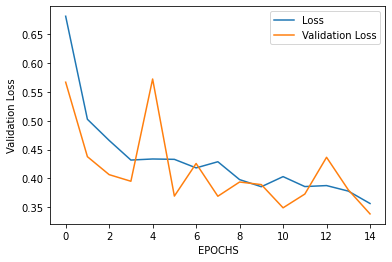

In [12]:
plt.plot(list(range(15)),loss,label="Loss")
plt.plot(list(range(15)),validation_loss,label="Validation Loss")
plt.xlabel("EPOCHS")
plt.ylabel("Validation Loss")
plt.legend()
plt.show()

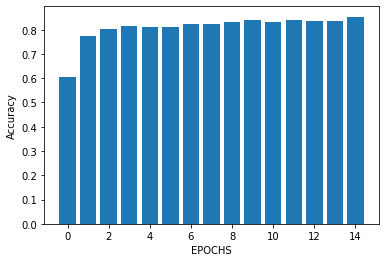

In [13]:
plt.bar(list(range(15)),accuracy)
plt.xlabel("EPOCHS")
plt.ylabel("Accuracy")
plt.show()